In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import axes3d
import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
from IPython.display import clear_output
import datetime
import hashlib
sns.set()

In [519]:
def norcampo (df):
    
    for i in df.columns:
        if i == "Energy_type":
            df.rename(columns={i:"Combustible"}, inplace=True)
        elif "Energ" in i:
            nom = i + " " + "TWh"
            df[nom] = df[i] / 3.412e+12

    return df

In [520]:
datos = pd.read_csv('D:\emissionsmap\documentation\data\energyco2.csv', sep=',', low_memory=False, encoding='utf-8')

In [521]:
datosWorld = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] != 'World')]
datosCountry = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] == 'World')]

In [522]:
datosWorld.drop(columns={'Unnamed: 0'}, inplace=True)
#datosCountry.drop(columns={'Unnamed: 0'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_36288\1383027141.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [523]:
datosWorld.isnull().sum() # cantidad de datos faltantes en cada columna

Country                           0
Energy_type                       0
Year                              0
Energy_consumption              647
Energy_production               647
GDP                            2569
Population                     1571
Energy_intensity_per_capita     847
Energy_intensity_by_GDP         847
CO2_emission                    869
dtype: int64

In [425]:
datosWorld.isnull().sum().sum() #total de datos faltantes

53137

In [524]:
datosWorld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 6 to 55434
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      9200 non-null   object 
 1   Energy_type                  9200 non-null   object 
 2   Year                         9200 non-null   int64  
 3   Energy_consumption           8553 non-null   float64
 4   Energy_production            8553 non-null   float64
 5   GDP                          6631 non-null   float64
 6   Population                   7629 non-null   float64
 7   Energy_intensity_per_capita  8353 non-null   float64
 8   Energy_intensity_by_GDP      8353 non-null   float64
 9   CO2_emission                 8331 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 790.6+ KB


In [525]:
datosWorld['Id']  = datosWorld['Year'].apply(lambda x: str(x))
datosWorld['Id_fin'] = datosWorld['Id'] + datosWorld['Country']

C:\Users\Admin\AppData\Local\Temp\ipykernel_36288\2450735850.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_36288\2450735850.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [526]:
datosWorld['Id_hash'] = datosWorld['Id_fin'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

C:\Users\Admin\AppData\Local\Temp\ipykernel_36288\518957544.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [527]:
col = datosWorld.pop("Id_hash")
datosWorld.insert(3, col.name, col)


In [528]:
datosWorld = datosWorld.drop(columns=['Id', 'Id_fin'])
data_fin = datosWorld

In [529]:
datosWorld = datosWorld.drop(columns=['Country', 'Energy_type', 'Year'])

In [530]:
datosWorld.reset_index(inplace=True, drop=True)

In [531]:
datosWorld

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,2ecafd051f51dfb0f62b8ea2180c2590,0.026583,0.072561,NaN,13356.500,1.990283,0.000000,NaN
1,3bce3ee1ec02d4da99a91a238fca3cd0,0.162982,0.155562,NaN,2682.700,60.752906,0.000000,NaN
2,3a0432f7cf6e15e3493e5e061a2acad0,0.780695,2.803017,NaN,19221.700,40.615303,0.000000,NaN
3,fbbe8dcba0b3ef5aed7328916301e503,0.005893,0.000000,NaN,32.646,180.515604,0.000000,NaN
4,292a7d7b0907c5eca7e35d3825f09b0b,0.058366,0.335098,NaN,8341.290,6.997257,0.000000,NaN
...,...,...,...,...,...,...,...,...
9195,245124a1c823dc26c546284c073a60fb,0.019436,0.000000,NaN,NaN,0.000000,0.000000,1.273787
9196,4b6bd0969e31290698ac477e04e3a7cc,0.003712,0.000000,NaN,NaN,0.000000,0.000000,0.263038
9197,5cdac236da06100ca5ed65f07395268e,0.159020,0.133273,53.0838,29162.200,5.452938,2.995635,8.292505
9198,9bfb0677f9a1f98458fe74f88825dc4f,0.207097,0.148004,247.1819,17873.850,11.586567,0.837831,7.096290


In [532]:
columnas = datosWorld.columns

In [533]:
#conjunto de variables de entrada
X = datosWorld.iloc[:,1:].values

In [534]:
X

array([[2.65832167e-02, 7.25611561e-02,            nan, ...,
        1.99028313e+00, 0.00000000e+00,            nan],
       [1.62981822e-01, 1.55561620e-01,            nan, ...,
        6.07529063e+01, 0.00000000e+00,            nan],
       [7.80695167e-01, 2.80301736e+00,            nan, ...,
        4.06153029e+01, 0.00000000e+00,            nan],
       ...,
       [1.59019669e-01, 1.33273097e-01, 5.30838000e+01, ...,
        5.45293802e+00, 2.99563462e+00, 8.29250523e+00],
       [2.07096557e-01, 1.48003794e-01, 2.47181900e+02, ...,
        1.15865668e+01, 8.37830589e-01, 7.09628982e+00],
       [1.68650809e-01, 1.43462207e-01, 3.76204000e+01, ...,
        1.15087012e+01, 4.48296160e+00, 8.96475902e+00]])

In [535]:
Y = datosWorld.iloc[:,0].values

In [536]:
Y

array(['2ecafd051f51dfb0f62b8ea2180c2590',
       '3bce3ee1ec02d4da99a91a238fca3cd0',
       '3a0432f7cf6e15e3493e5e061a2acad0', ...,
       '5cdac236da06100ca5ed65f07395268e',
       '9bfb0677f9a1f98458fe74f88825dc4f',
       '3997c7c7530d0771409d285a6e1c265a'], dtype=object)

In [537]:
from sklearn.model_selection import train_test_split

In [538]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [539]:
from sklearn.impute import KNNImputer

In [540]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [541]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [542]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [543]:
X = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train, Y_test], axis=0)

In [544]:
X

,0,1,2,3,4,5,6
0,0.003967,0.000761,17.169400,2646.840000,1.498947,0.000000,0.200000
1,0.383425,0.062433,100.479000,3968.490000,96.617375,3.815972,22.365397
2,0.000000,0.000000,0.932800,47.859600,0.000000,0.000000,0.000000
3,0.000190,0.000000,0.932800,52.261800,0.000000,0.000000,0.000000
4,0.119894,0.055378,34.339300,3068.710000,39.069808,3.491449,4.000000
...,...,...,...,...,...,...,...
1835,2.077570,2.061800,430.594028,32147.702614,71.615361,3.673935,127.850356
1836,0.211891,0.036892,129.705000,40901.770000,5.180492,1.633640,11.349061
1837,0.127084,0.730810,25.420600,383.902000,331.032704,4.999257,10.533826
1838,0.004542,0.001282,5.352720,6704.120000,0.677464,0.848504,0.400000


In [545]:
Y

,0
0,ed3d61f418228be108b367c9134c8dc8
1,b3df49aa9d3cbeb908454aeb3fc7f3d0
2,21c812d8a1f07852231c3d3bdcd67474
3,a6049a5ab1190c55e1cbaebfe9cfec64
4,e91afe34bcccc0f79dd27546cbd8eed8
...,...
1835,00d917a6eb845b24cda53c74ba3883a9
1836,2e558ee3b383b85932b39f0fc77bffea
1837,d1c0b57519573805d8e345efcd9d37af
1838,abea3c0b659bda471a7d140c457e8ace


In [546]:
data = pd.concat([Y, X], axis=1)

In [547]:
data

,0,0,1,2,3,4,5,6
0,ed3d61f418228be108b367c9134c8dc8,0.003967,0.000761,17.169400,2646.840000,1.498947,0.000000,0.200000
1,b3df49aa9d3cbeb908454aeb3fc7f3d0,0.383425,0.062433,100.479000,3968.490000,96.617375,3.815972,22.365397
2,21c812d8a1f07852231c3d3bdcd67474,0.000000,0.000000,0.932800,47.859600,0.000000,0.000000,0.000000
3,a6049a5ab1190c55e1cbaebfe9cfec64,0.000190,0.000000,0.932800,52.261800,0.000000,0.000000,0.000000
4,e91afe34bcccc0f79dd27546cbd8eed8,0.119894,0.055378,34.339300,3068.710000,39.069808,3.491449,4.000000
...,...,...,...,...,...,...,...,...
1835,00d917a6eb845b24cda53c74ba3883a9,2.077570,2.061800,430.594028,32147.702614,71.615361,3.673935,127.850356
1836,2e558ee3b383b85932b39f0fc77bffea,0.211891,0.036892,129.705000,40901.770000,5.180492,1.633640,11.349061
1837,d1c0b57519573805d8e345efcd9d37af,0.127084,0.730810,25.420600,383.902000,331.032704,4.999257,10.533826
1838,abea3c0b659bda471a7d140c457e8ace,0.004542,0.001282,5.352720,6704.120000,0.677464,0.848504,0.400000


In [548]:
data.columns = columnas

In [549]:
data

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,ed3d61f418228be108b367c9134c8dc8,0.003967,0.000761,17.169400,2646.840000,1.498947,0.000000,0.200000
1,b3df49aa9d3cbeb908454aeb3fc7f3d0,0.383425,0.062433,100.479000,3968.490000,96.617375,3.815972,22.365397
2,21c812d8a1f07852231c3d3bdcd67474,0.000000,0.000000,0.932800,47.859600,0.000000,0.000000,0.000000
3,a6049a5ab1190c55e1cbaebfe9cfec64,0.000190,0.000000,0.932800,52.261800,0.000000,0.000000,0.000000
4,e91afe34bcccc0f79dd27546cbd8eed8,0.119894,0.055378,34.339300,3068.710000,39.069808,3.491449,4.000000
...,...,...,...,...,...,...,...,...
1835,00d917a6eb845b24cda53c74ba3883a9,2.077570,2.061800,430.594028,32147.702614,71.615361,3.673935,127.850356
1836,2e558ee3b383b85932b39f0fc77bffea,0.211891,0.036892,129.705000,40901.770000,5.180492,1.633640,11.349061
1837,d1c0b57519573805d8e345efcd9d37af,0.127084,0.730810,25.420600,383.902000,331.032704,4.999257,10.533826
1838,abea3c0b659bda471a7d140c457e8ace,0.004542,0.001282,5.352720,6704.120000,0.677464,0.848504,0.400000


In [550]:
data = norcampo(data)

In [556]:
data

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh
0,ed3d61f418228be108b367c9134c8dc8,0.003967,0.000761,17.169400,2646.840000,1.498947,0.000000,0.200000,1.162800e-15,2.229153e-16,4.393162e-13,0.000000e+00
1,b3df49aa9d3cbeb908454aeb3fc7f3d0,0.383425,0.062433,100.479000,3968.490000,96.617375,3.815972,22.365397,1.123755e-13,1.829805e-14,2.831693e-11,1.118398e-12
2,21c812d8a1f07852231c3d3bdcd67474,0.000000,0.000000,0.932800,47.859600,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,a6049a5ab1190c55e1cbaebfe9cfec64,0.000190,0.000000,0.932800,52.261800,0.000000,0.000000,0.000000,5.557301e-17,0.000000e+00,0.000000e+00,0.000000e+00
4,e91afe34bcccc0f79dd27546cbd8eed8,0.119894,0.055378,34.339300,3068.710000,39.069808,3.491449,4.000000,3.513890e-14,1.623034e-14,1.145071e-11,1.023285e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1835,00d917a6eb845b24cda53c74ba3883a9,2.077570,2.061800,430.594028,32147.702614,71.615361,3.673935,127.850356,6.089008e-13,6.042790e-13,2.098926e-11,1.076769e-12
1836,2e558ee3b383b85932b39f0fc77bffea,0.211891,0.036892,129.705000,40901.770000,5.180492,1.633640,11.349061,6.210179e-14,1.081243e-14,1.518315e-12,4.787925e-13
1837,d1c0b57519573805d8e345efcd9d37af,0.127084,0.730810,25.420600,383.902000,331.032704,4.999257,10.533826,3.724622e-14,2.141882e-13,9.702014e-11,1.465198e-12
1838,abea3c0b659bda471a7d140c457e8ace,0.004542,0.001282,5.352720,6704.120000,0.677464,0.848504,0.400000,1.331126e-15,3.756735e-16,1.985534e-13,2.486822e-13


In [562]:
co = ['Id_hash', 'Energy_consumption TWh', 'Energy_production TWh', 'Energy_intensity_per_capita TWh', 'Energy_intensity_by_GDP TWh', 'CO2_emission']

In [563]:
df_fin = pd.merge(data_fin[['Id_hash', 'Country', 'Energy_type', 'Year']], data[co], on=['Id_hash'], how='left')

In [564]:
df_fin.head(7)

,Id_hash,Country,Energy_type,Year,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh,CO2_emission
0,2ecafd051f51dfb0f62b8ea2180c2590,Afghanistan,all_energy_types,1980,7.791095e-15,2.126646e-14,5.833186e-13,0.0,1.008605
1,3bce3ee1ec02d4da99a91a238fca3cd0,Albania,all_energy_types,1980,4.776724e-14,4.559250e-14,1.780566e-11,0.0,10.470181
2,3a0432f7cf6e15e3493e5e061a2acad0,Algeria,all_energy_types,1980,2.288087e-13,8.215174e-13,1.190366e-11,0.0,80.293368
3,fbbe8dcba0b3ef5aed7328916301e503,American Samoa,all_energy_types,1980,1.727172e-15,0.000000e+00,5.290610e-11,0.0,0.454541
4,292a7d7b0907c5eca7e35d3825f09b0b,Angola,all_energy_types,1980,1.710614e-14,9.821162e-14,2.050779e-12,0.0,1.937452
5,e23dd669832a239454637e4be1dcf502,Antarctica,all_energy_types,1980,6.248388e-16,0.000000e+00,0.000000e+00,0.0,0.160000
6,5b90a78a960923b15bc9ef44dfd19d06,Antigua and Barbuda,all_energy_types,1980,1.701306e-15,0.000000e+00,0.000000e+00,0.0,0.380000


In [571]:
pruebas = df_fin.iloc[:,2:]

In [572]:
pruebas

,Energy_type,Year,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh,CO2_emission
0,all_energy_types,1980,7.791095e-15,2.126646e-14,5.833186e-13,0.000000e+00,1.008605
1,all_energy_types,1980,4.776724e-14,4.559250e-14,1.780566e-11,0.000000e+00,10.470181
2,all_energy_types,1980,2.288087e-13,8.215174e-13,1.190366e-11,0.000000e+00,80.293368
3,all_energy_types,1980,1.727172e-15,0.000000e+00,5.290610e-11,0.000000e+00,0.454541
4,all_energy_types,1980,1.710614e-14,9.821162e-14,2.050779e-12,0.000000e+00,1.937452
...,...,...,...,...,...,...,...
9195,all_energy_types,2019,5.696379e-15,0.000000e+00,0.000000e+00,0.000000e+00,1.273787
9196,all_energy_types,2019,1.087953e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.263038
9197,all_energy_types,2019,4.660600e-14,3.906011e-14,1.598165e-12,8.779703e-13,8.292505
9198,all_energy_types,2019,6.069653e-14,4.337743e-14,3.395828e-12,2.455541e-13,7.096290


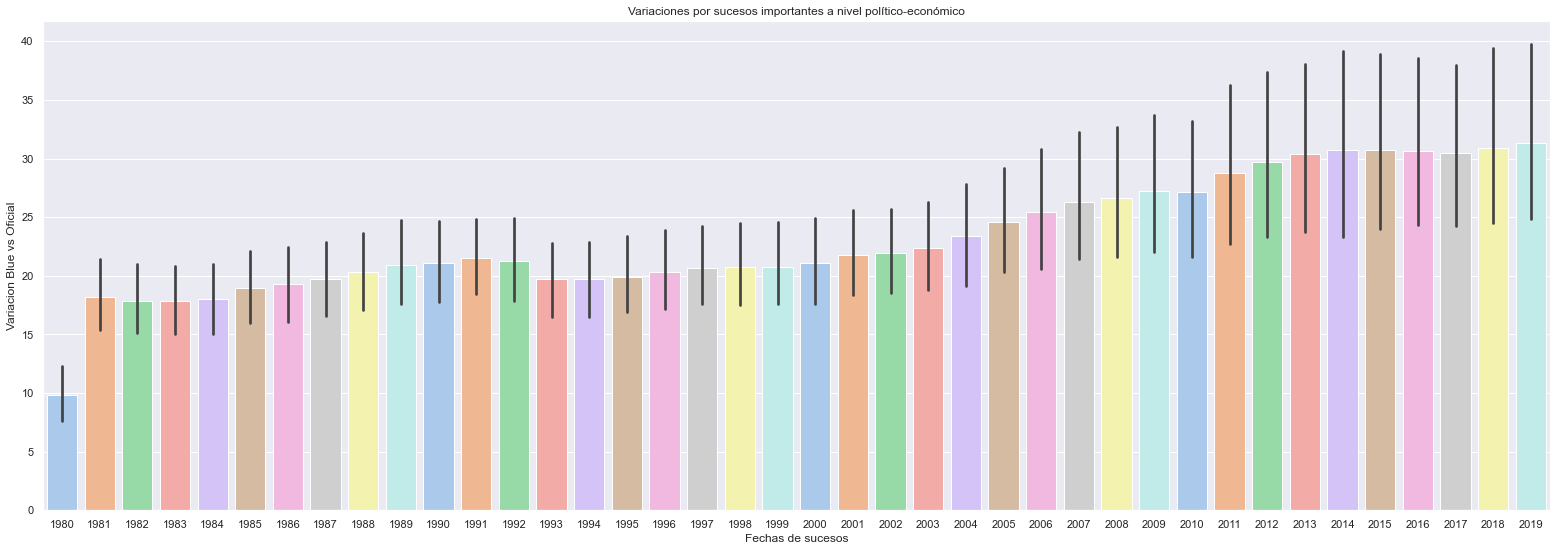

In [473]:
plt.figure(figsize=(27,9))
sns.barplot(data=df_fin, x="Year", y="CO2_emission", palette='pastel')
plt.title('Emiciones de CO2')
plt.xlabel('Fechas de sucesos')
plt.ylabel('Emicion Co2 GWth')
plt.show()

In [581]:
agrup = pruebas.groupby('Year')['CO2_emission'].sum()

In [582]:
agrup = agrup.reset_index()

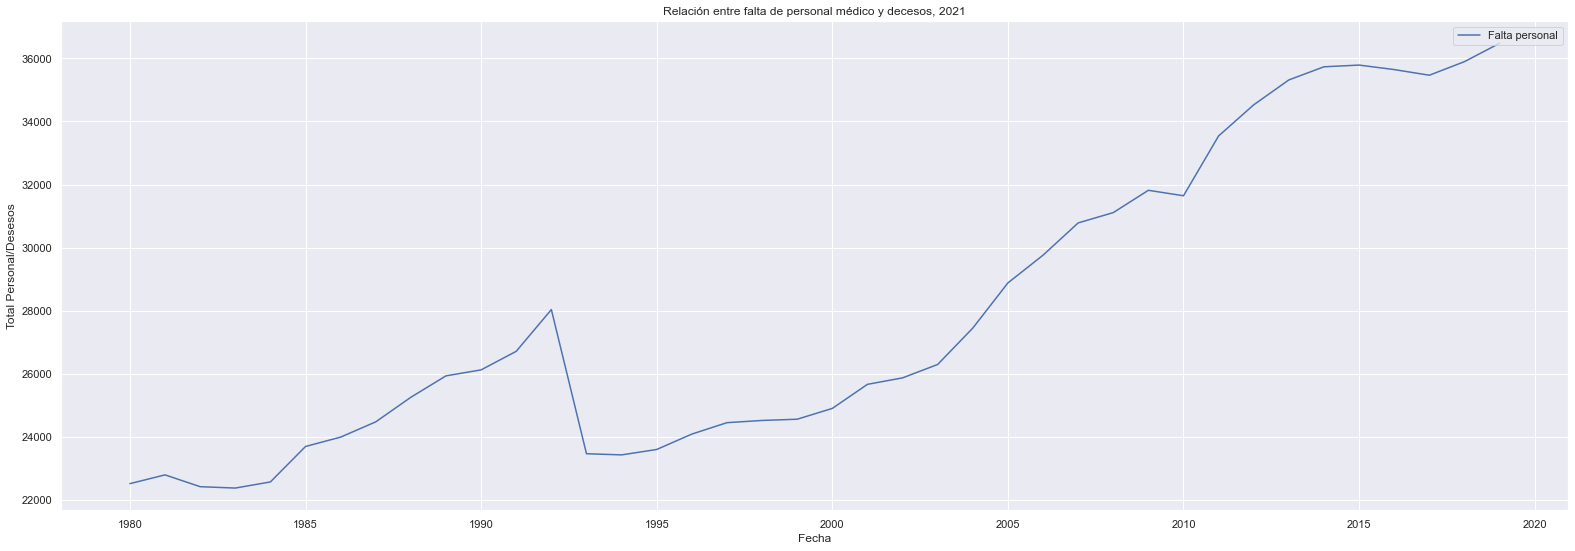

In [583]:
plt.figure(figsize=(27,9))
sns.lineplot(data=agrup, x='Year', y='CO2_emission', palette='pastel')

plt.title('Relación entre falta de personal médico y decesos, 2021')
plt.xlabel('Fecha')
plt.ylabel('Total Personal/Desesos')
plt.legend(['Falta personal', 'Deceso covid'], loc='upper right')
plt.show()

In [508]:
df_fin_or = df_fin.groupby('Year')['Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'CO2_emission'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_36288\708972765.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [510]:
import plotly.offline as py
col=['Energy_consumption', 'Energy_production',
                 'Energy_intensity_per_capita', 'CO2_emission']
py.iplot([{
    'x':df_fin_or.index,
    'y':df_fin_or[col],
    'name': col
} for col in  df_fin_or.columns], filename='cufflinks/multiple-lines-on-same-chart')

In [584]:
import plotly.graph_objects as go

In [585]:
def linealPlot(df_new):
    #df_new = df_new[(df_new["País"] == "World") & (df_new["Tipo_Energia"] == "all_energy_types")]
    #df_new = df_new[["País", "Year", "CO2_emission"]]
    fig= go.Figure(data=[
        go.Scatter(
        x=df_new['Year'],
        y=df_new['CO2_emission'],
        mode='lines', 
        name='Emisiones Co2',
        line=dict(color='cyan')
        )
    ])
    fig.update_layout(
        height=300, width=1000,
        plot_bgcolor='black',
        paper_bgcolor= 'black',
        font_color='#cee3e1',
        legend=dict(
            x=0.05,
            y=1,
            title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=12,
                color="LightSteelBlue"
            ),
            bgcolor="Black",
            bordercolor="LightSteelBlue",
            borderwidth=1
        ),
        xaxis=dict(showgrid=False,showline=True,linecolor='rgb(255,255,255)'),
        yaxis=dict(showgrid=False),
        margin=dict(l=10,r=10,b=10,t=10)
    )
    return fig

In [586]:
linealPlot(agrup)

In [587]:
agrup

,Year,CO2_emission
0,1980,22515.526117
1,1981,22793.185797
2,1982,22418.625375
3,1983,22375.213750
4,1984,22569.723621
5,1985,23693.758774
6,1986,23991.071222
7,1987,24474.732453
8,1988,25255.051964
9,1989,25933.753458


In [588]:
import folium


m = folium.Map(location=[40.965, -5.664])

In [589]:
m